In [13]:
%matplotlib inline
import cfg
import os
import numpy as np
from tqdm import tqdm
import keras.backend as K
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from mymodel.srgen import SrGen
from mydata.utils import Preprocess, InvertedProcess, ShowImage

In [2]:
dir_model = '/home/liao/DM/Models/sisr_wgan.hdf5'
def GetModel(h, w, model_path=dir_model):
    K.clear_session()
    model = SrGen(input_shape=(h, w, 3))
    model.load_weights(model_path)
    return model

In [3]:
model = GetModel(None, None, dir_model)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from mydata.loader_coco import COCO
ds = COCO(root=cfg.PATH_COCO, ratio=2, debug=True)
gen_tr = ds.GetGenerator_Tr()
gen_val = ds.GetGenerator_Val()

In [8]:
def Convert(img):
    img = InvertedProcess(img)[0]
    img = img.astype(np.uint8)
    # ShowImage(img)
    # img = Image.fromarray(img)
    # img.save(path)
    return img

In [9]:
lrs = []
hrs = []
preds = []
for idx in tqdm(range(5)):
    lr, hr = next(gen_val)
    pred = model.predict_on_batch(lr)
    lrs.append(Convert(lr))
    hrs.append(Convert(hr))
    preds.append(Convert(pred))

100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


In [18]:
def PlotResults(list_imgs, list_names, figsize=8):
    assert len(list_imgs)==len(list_names)
    num_imgs = len(list_imgs)
    num_batch = len(list_imgs[0])
    fig, axs = plt.subplots(num_batch, num_imgs, figsize=(figsize*num_imgs,figsize*num_batch))
    for batch_id in range(num_batch):
        for img_id in range(num_imgs):
            axs[batch_id, img_id].imshow(list_imgs[img_id][batch_id])
            axs[batch_id, img_id].set_title(list_names[img_id])
            axs[batch_id, img_id].axis('off')
    plt.show()
    plt.close()

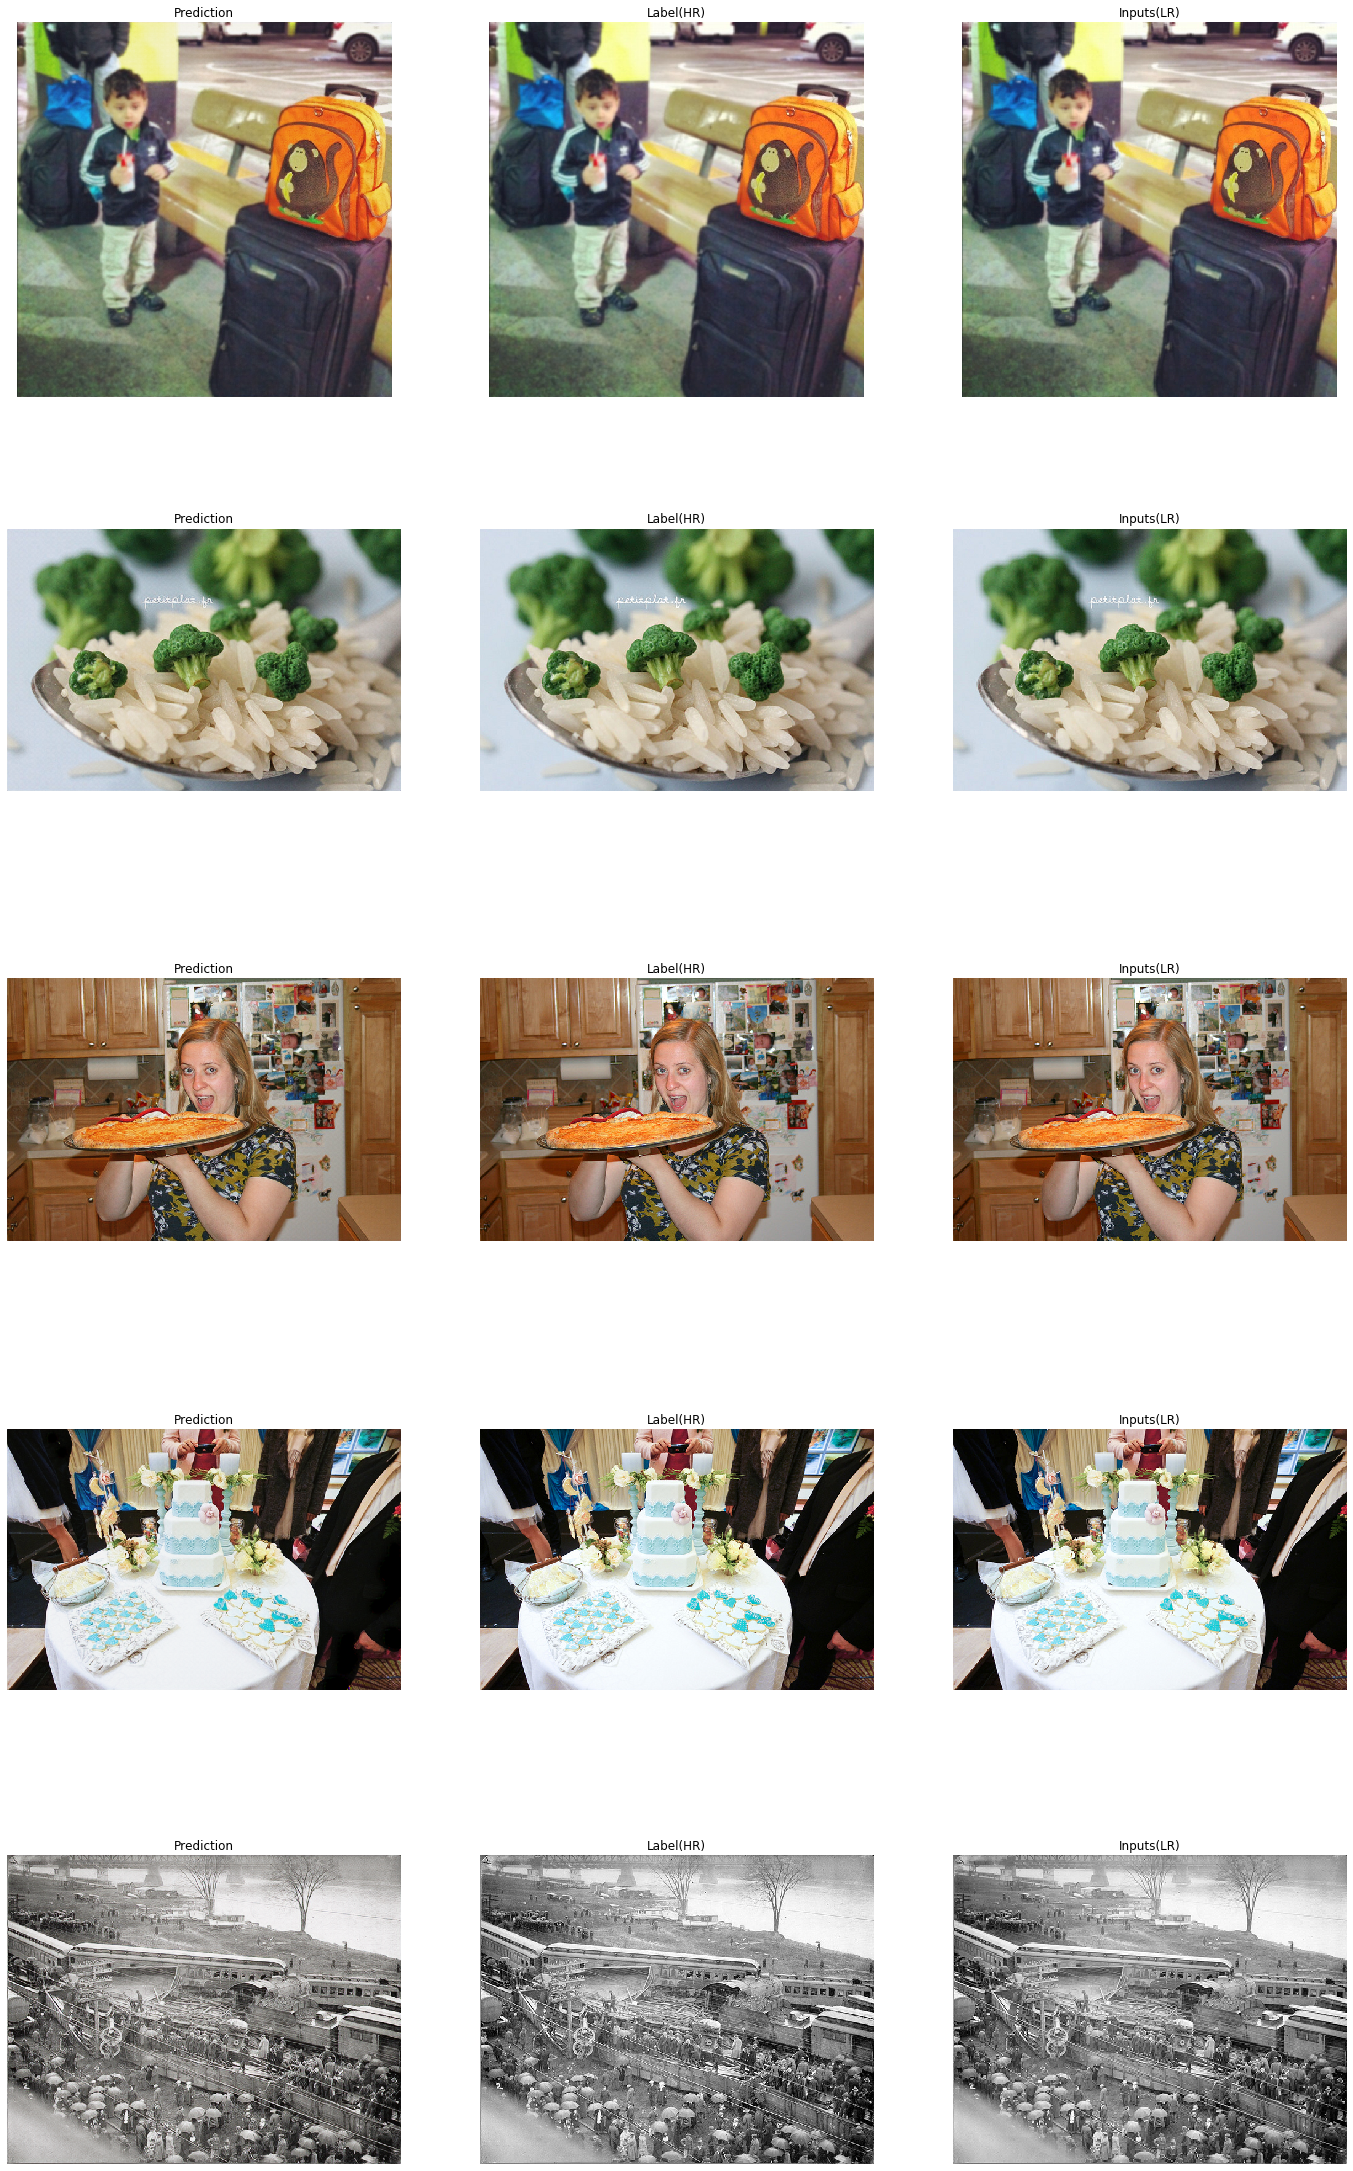

In [19]:
PlotResults([preds, hrs, lrs,], ['Prediction', 'Label(HR)', 'Inputs(LR)'], figsize=8)